Q1: How many observations (rows) and how many variables (columns) are there in the raw data?

In [178]:
import pandas as pd 
adult = pd.read_csv("C:/Users/andre/OneDrive/Documents/SMU Coursework/Fall Mod B/ITOM 6267 (DM)/HW 1/adult.csv", header=None, sep=',\s', engine='python')
adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adult.info()
adult.head()
# There are 32,560 observations prior to adding column names and 15 columns 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Q2: Produce a table of variables showing their types.

In [179]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Q3: Some of the variables appear to be numeric but should be treated as categorical. Your best clue is whether a variable has only a few discrete values. Which numeric variables should be treated as categorical?

In [180]:
# Education-num is numeric when it should be categorical 


adult['education-num'] = adult['education-num'].astype(str)
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 3.7+ MB


Q4: For numeric variables, produce a table of statistics including missing values, min, max, median, mean, standard deviation, skewness and kurtosis.

In [181]:
numeric = adult.select_dtypes(include = ['float64', 'int64'])
numeric.info()
numeric.head()

#Double check which columns are numeric 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   capital-gain    32561 non-null  int64
 3   capital-loss    32561 non-null  int64
 4   hours-per-week  32561 non-null  int64
dtypes: int64(5)
memory usage: 1.2 MB


,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40


In [182]:
numeric.isnull().sum()

#Determine if there are any missing values in the numeric columns 

age               0
fnlwgt            0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [183]:
numeric_statistics = numeric.agg(['min', 'max', 'median', 'mean', 'std', 'skew', 'kurt'])
numeric_statistics

#Determine the statistics required for the numeric columns 

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000
median,37.000000,1.783560e+05,0.000000,0.000000,40.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
skew,0.558743,1.446980e+00,11.953848,4.594629,0.227643
kurt,-0.166127,6.218811e+00,154.799438,20.376802,2.916687


Q5: How many outliers are present in each numeric variable? Show the tallies in a table. Set them to missing.

In [184]:
import numpy as np

for j in numeric :
    upper_quartile = np.nanpercentile(adult[j], 75)
    lower_quartile = np.nanpercentile(adult[j], 25)
    iqr = upper_quartile - lower_quartile
    
    upper_whisker = upper_quartile + 1.5 * iqr
    lower_whisker = np.maximum((lower_quartile - 1.5 * iqr), 0)
    
    adult[j] = np.where((adult[j] < lower_whisker) |
                      (adult[j] > upper_whisker), np.nan, adult[j])
    
adult.isnull().sum()

# Used a for loop to calculate outliers based on a quartile method and replaced them as NA 

age                143
workclass            0
fnlwgt             992
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain      2712
capital-loss      1519
hours-per-week    9008
native-country       0
income               0
dtype: int64

Q6: Count the unique values of each categorical variable, including missing values. Are there any unusual values in any of the categorical variables?

In [185]:
categorical = adult.select_dtypes(include = ['object'])
categorical.info()
categorical.head()
#Double check what columns are categorical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   education-num   32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   native-country  32561 non-null  object
 9   income          32561 non-null  object
dtypes: object(10)
memory usage: 2.5+ MB


,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [186]:
#Check missing values in categorical variables

categorical.isnull().sum()

workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64

In [187]:
#Check unique frequency counts of categorical data

for col in categorical:
    print(categorical[col].unique())

#Workclass, occupation, and native-country have "?" values

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['13' '9' '7' '14' '5' '10' '12' '11' '4' '16' '15' '3' '6' '2' '1' '8']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 

In [188]:
# Check number of Unique Values for Categorical Data

categorical.nunique()

# Doesn't include ? values for workclass, occupation, and native-country

workclass          9
education         16
education-num     16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
income             2
dtype: int64

Q7: Impute the missing values. Be sure to explain how you did that in your presentation.

In [189]:
# Replace missing values in numeric columns with column means 

for v in numeric:
    adult[v].fillna(value = adult[v].mean(), inplace = True)
    
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [190]:
# Replace "?" values in the workclass, occupation, and native-country columns with their respective modes 

import numpy as np 

adult['workclass'].replace('?', np.NaN, inplace=True)
adult['workclass'].fillna('Private', inplace=True)
    
print(adult.workclass.value_counts())

adult['occupation'].replace('?', np.NaN, inplace=True)
adult['occupation'].fillna('Prof-specialty', inplace=True)

print(adult.occupation.value_counts())

adult['native-country'].replace('?', np.NaN, inplace=True)
adult['native-country'].fillna('United-States', inplace=True)

print(adult['native-country'].value_counts())





Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica

In [191]:
# Rescale fnlwgt
# Minimum fnlwgt value is (from Question 4)

adult['fnlwgt'] = adult['fnlwgt'].div(12285).round(0)
adult.head(5)







,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,6.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.000000,United-States,<=50K
1,50.0,Self-emp-not-inc,7.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,41.565533,United-States,<=50K
2,38.0,Private,18.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.000000,United-States,<=50K
3,53.0,Private,19.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.000000,United-States,<=50K
4,28.0,Private,28.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.000000,Cuba,<=50K


In [192]:
# Expand fnlwgt values

adult_expanded = adult.loc[adult.index.repeat(adult['fnlwgt'])]


adult_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476432 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             476432 non-null  float64
 1   workclass       476432 non-null  object 
 2   fnlwgt          476432 non-null  float64
 3   education       476432 non-null  object 
 4   education-num   476432 non-null  object 
 5   marital-status  476432 non-null  object 
 6   occupation      476432 non-null  object 
 7   relationship    476432 non-null  object 
 8   race            476432 non-null  object 
 9   sex             476432 non-null  object 
 10  capital-gain    476432 non-null  float64
 11  capital-loss    476432 non-null  float64
 12  hours-per-week  476432 non-null  float64
 13  native-country  476432 non-null  object 
 14  income          476432 non-null  object 
dtypes: float64(5), object(10)
memory usage: 58.2+ MB


Q8: Produce a histogram or boxplot for each of the numeric variables.

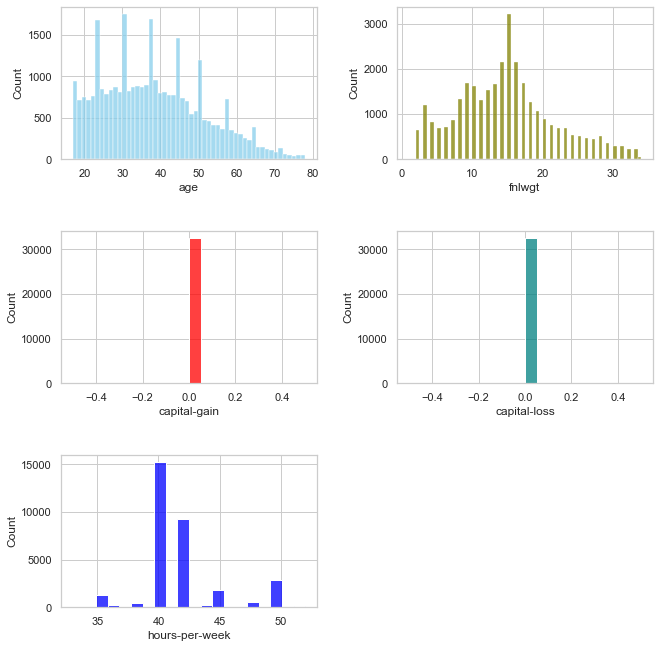

In [193]:
import seaborn as sb
from io import BytesIO
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)


# switch to seaborn default aesthetics
sb.set()

# Create buffer to write plots into
buffer = BytesIO() 

# Create plot and write it into the buffer

sb.set_style("whitegrid")
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
plt.tight_layout(h_pad=4, pad=4)
axes[2, 1].remove()
sb.histplot( adult["age"] , color="skyblue", ax=axes[0, 0])
sb.histplot( adult["fnlwgt"] , color="olive", ax=axes[0, 1])
sb.histplot( adult["capital-gain"] , bins=20, color="red", ax=axes[1, 0])
sb.histplot( adult["capital-loss"] , bins=20, color="teal", ax=axes[1, 1])
sb.histplot( adult["hours-per-week"] , bins=20, color="blue", ax=axes[2, 0]).get_figure().savefig(buffer, format='svg')

<AxesSubplot:ylabel='fnlwgt'>

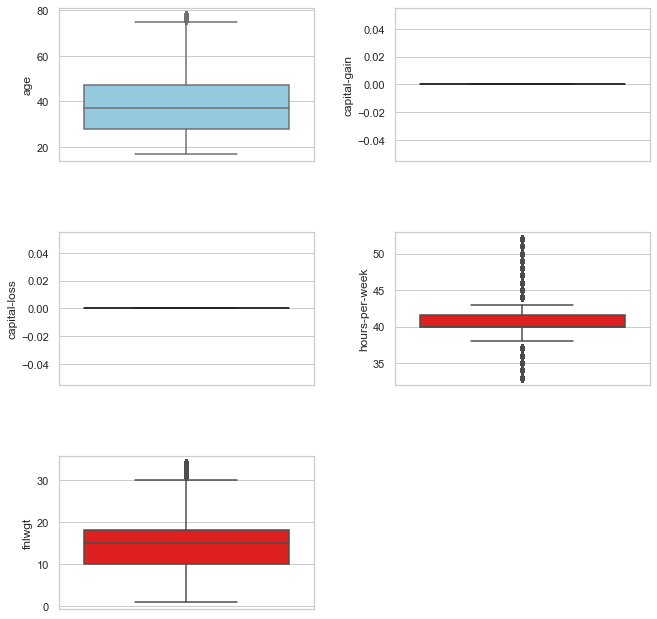

In [194]:
import seaborn as sb
from io import BytesIO
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)


# switch to seaborn default aesthetics
sb.set()

# Create buffer to write plots into
buffer = BytesIO() 

# Create plot and write it into the buffer

sb.set_style("whitegrid")
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
plt.tight_layout(h_pad=4, pad=4)
axes[2, 1].remove()
sb.boxplot( y=adult["age"], color="skyblue", ax=axes[0, 0])
sb.boxplot( y=adult["capital-gain"],color="olive", ax=axes[0, 1])
sb.boxplot( y=adult["capital-loss"], color="teal", ax=axes[1, 0])
sb.boxplot( y=adult["hours-per-week"],color="red", ax=axes[1, 1])
sb.boxplot( y=adult["fnlwgt"],color="red", ax=axes[2,0])
#sb.boxplot( x=adult["age"], y=adult['income'], color="skyblue", ax=axes[0, 0])
#sb.boxplot( x=adult["capital_gain"], y=adult['income'], color="olive", ax=axes[0, 1])
#.get_figure().savefig(buffer, format='svg')


Q9: Produce a bar chart for each of the categorical variables showing the counts for each unique value.

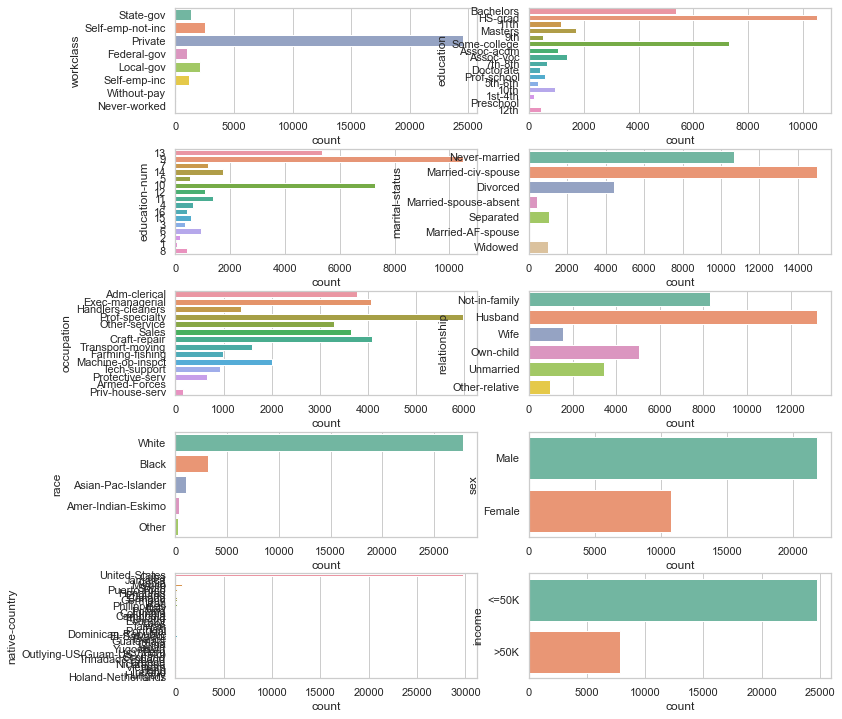

In [195]:
import seaborn as sb
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (5,5)

# switch to seaborn default aesthetics
sb.set()

# Create buffer to write plots into
buffer = BytesIO() 

# Create plot and write it into the buffer
sb.set_style("whitegrid")
sb.set_palette("Set2")
f, axes = plt.subplots(5, 2, figsize=(10, 10), sharex=False)
#axes[3, 1].remove()
#plt.tight_layout(h_pad=2, w_pad=4, pad=6)
plt.tight_layout()
sb.countplot( y=adult["workclass"] , ax=axes[0, 0])
sb.countplot( y=adult["education"] , ax=axes[0, 1])
sb.countplot( y=adult["education-num"] , ax=axes[1, 0])
sb.countplot( y=adult["marital-status"] , ax=axes[1, 1])
sb.countplot( y=adult["occupation"] , ax=axes[2, 0])
sb.countplot( y=adult["relationship"] , ax=axes[2, 1])
sb.countplot( y=adult["race"] , ax=axes[3, 0])
sb.countplot( y=adult["sex"] , ax=axes[3, 1])
sb.countplot( y=adult["native-country"] , ax=axes[4, 0])
sb.countplot( y=adult["income"] , ax=axes[4, 1]).get_figure().savefig(buffer, format='svg')

# Bring plots back to KNIME node output port
output_image = buffer.getvalue()

In [196]:
# Export new manipulated csv file for use in KNIME

#Check that dataframe has been updated
adult_expanded.head(20)

adult_expanded.to_csv(r'C:\Users\andre\OneDrive\Documents\SMU Coursework\Fall Mod B\ITOM 6267 (DM)\adult values filled with rows expanded.csv', index = False, header = True)

SyntaxError: invalid syntax (1628867761.py, line 6)